<a href="https://colab.research.google.com/github/Josh1313/Python_preprocesing/blob/main/BmwPreprocesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
'''leer archivo'''
df = pd.read_pickle("/content/drive/MyDrive/Bmw_data_preproceamiento/Clases_limpieza/df_limpio.pkl")

In [90]:
pd.options.display.float_format = '{:.0f}'.format

In [91]:
df.shape

(4802, 18)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4802
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   km                           4802 non-null   float64       
 1   potencia                     4802 non-null   float64       
 2   fecha_registro               4802 non-null   datetime64[ns]
 3   tipo_gasolina                4802 non-null   object        
 4   color                        4802 non-null   object        
 5   tipo_coche                   4802 non-null   object        
 6   volante_regulable            4802 non-null   bool          
 7   aire_acondicionado           4802 non-null   bool          
 8   camara_trasera               4802 non-null   bool          
 9   asientos_traseros_plegables  4802 non-null   bool          
 10  elevalunas_electrico         4802 non-null   bool          
 11  bluetooth                    4802 non-null 

In [93]:
df.describe()

,km,potencia,precio,tiempo_venta
count,4802,4802,4802,4802
mean,140906,129,15866,65
std,60265,39,9230,31
min,64,25,100,7
25%,102691,100,10900,49
50%,140866,120,14200,58
75%,175230,135,18700,71
max,1000376,423,178500,341


In [94]:
df.isnull().sum().sum()

0

In [95]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4798    False
4799    False
4800    False
4801    False
4802    False
Length: 4802, dtype: bool

array([[<Axes: title={'center': 'km'}>,
        <Axes: title={'center': 'potencia'}>],
       [<Axes: title={'center': 'fecha_registro'}>,
        <Axes: title={'center': 'precio'}>],
       [<Axes: title={'center': 'fecha_venta'}>,
        <Axes: title={'center': 'tiempo_venta'}>]], dtype=object)

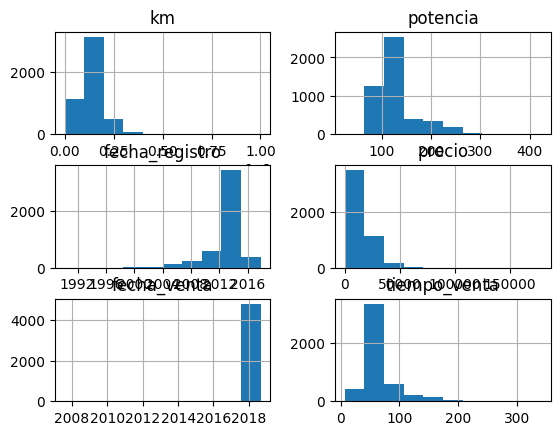

In [96]:
df.hist()

In [97]:
'''DE ACA EMPEZAREMOS NUESTRO PREPROCESAMIENTO univariables'''

'DE ACA EMPEZAREMOS NUESTRO PREPROCESAMIENTO univariables'

In [98]:
for i in df.columns:
    print('\n',i,df[i].unique(),'\n')


 km [140411.  13929. 183297. ...  49832.  19633.  27920.] 


 potencia [100. 317. 120. 135. 160. 225. 145. 105. 125. 130. 270. 110. 140. 180.
  85. 190. 236. 240. 250. 230. 309. 170. 142. 155. 210. 122. 200.  90.
 150. 141. 173. 137. 280. 112. 189.  80. 119.  95. 220. 107. 127.  25.
  70. 192. 101.  75. 239. 235.  87.  66.  77. 195. 183. 233. 121. 224.
 412. 423. 300. 261.] 


 fecha_registro ['2012-02-01T00:00:00.000000000' '2016-04-01T00:00:00.000000000'
 '2012-04-01T00:00:00.000000000' '2014-07-01T00:00:00.000000000'
 '2014-12-01T00:00:00.000000000' '2011-05-01T00:00:00.000000000'
 '2009-05-01T00:00:00.000000000' '2009-08-01T00:00:00.000000000'
 '2004-07-01T00:00:00.000000000' '2013-06-01T00:00:00.000000000'
 '2012-09-01T00:00:00.000000000' '2009-09-01T00:00:00.000000000'
 '2014-03-01T00:00:00.000000000' '2015-08-01T00:00:00.000000000'
 '2009-01-01T00:00:00.000000000' '2008-04-01T00:00:00.000000000'
 '2015-07-01T00:00:00.000000000' '2008-01-01T00:00:00.000000000'
 '2008-03-01T00:00

In [99]:
for i in df.columns:
    print('\n',i,df[i].value_counts(),'\n')


 km 187698    2
179630    2
101223    2
104753    2
120833    2
         ..
193148    1
141853    1
124869    1
266060    1
27920     1
Name: km, Length: 4745, dtype: int64 


 potencia 135    876
120    780
85     627
100    559
105    444
190    317
140    165
160    151
110    141
230    120
155     99
180     62
225     49
130     47
150     43
90      40
280     32
122     29
173     25
210     21
137     19
125     16
170     14
70      11
145      9
75       9
235      7
142      6
87       6
240      5
220      5
127      5
112      5
80       4
119      4
309      4
317      4
77       3
195      3
107      3
95       3
200      3
25       2
192      2
101      2
189      2
141      2
270      2
66       2
183      2
233      2
224      1
423      1
300      1
412      1
250      1
121      1
239      1
236      1
261      1
Name: potencia, dtype: int64 


 fecha_registro 2013-07-01    168
2014-03-01    161
2014-05-01    150
2013-09-01    146
2013-01-01    145
             ..

#'''5. SEPARAMOS NUESTRAS VARIABLES EN: TARGET, CATEGORICAS, BOOLEAN Y NUMERICAS'''

In [100]:
target= ["precio"]

In [101]:
def obtener_lista_variables(dataset):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]
    for i in dataset:
        if (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i") and len(dataset[i].unique())!= 2 and i not in target:
             lista_numericas.append(i)
        elif (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i" or dataset[i].dtype.kind=="b") and len(dataset[i].unique())== 2 and i not in target:
              lista_boolean.append(i)
        elif (dataset[i].dtype.kind=="O") and i not in target:
              lista_categoricas.append(i)


    return lista_numericas, lista_boolean, lista_categoricas

In [102]:
lista_numericas, lista_boolean, lista_categoricas= obtener_lista_variables(df)

In [103]:
lista_categoricas

['tipo_gasolina', 'color', 'tipo_coche', 'modelo_agrupado']

In [104]:
lista_numericas

['km', 'potencia', 'tiempo_venta']

In [105]:
lista_boolean

['volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'asientos_traseros_plegables',
 'elevalunas_electrico',
 'bluetooth',
 'gps',
 'alerta_lim_velocidad']

In [106]:
print(len(df.columns), "total de variables")
print(len(target), "variable a predecir")
print(len(lista_categoricas), "variables categóricas")
print(len(lista_boolean), "variables boolean")
print(len(lista_numericas), "variables numéricas")

18 total de variables
1 variable a predecir
4 variables categóricas
8 variables boolean
3 variables numéricas


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4802
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   km                           4802 non-null   float64       
 1   potencia                     4802 non-null   float64       
 2   fecha_registro               4802 non-null   datetime64[ns]
 3   tipo_gasolina                4802 non-null   object        
 4   color                        4802 non-null   object        
 5   tipo_coche                   4802 non-null   object        
 6   volante_regulable            4802 non-null   bool          
 7   aire_acondicionado           4802 non-null   bool          
 8   camara_trasera               4802 non-null   bool          
 9   asientos_traseros_plegables  4802 non-null   bool          
 10  elevalunas_electrico         4802 non-null   bool          
 11  bluetooth                    4802 non-null 

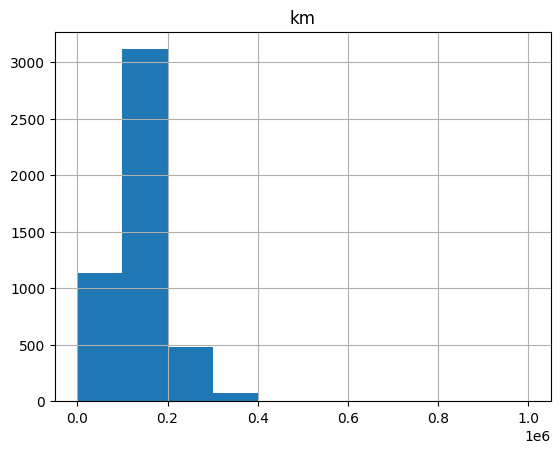

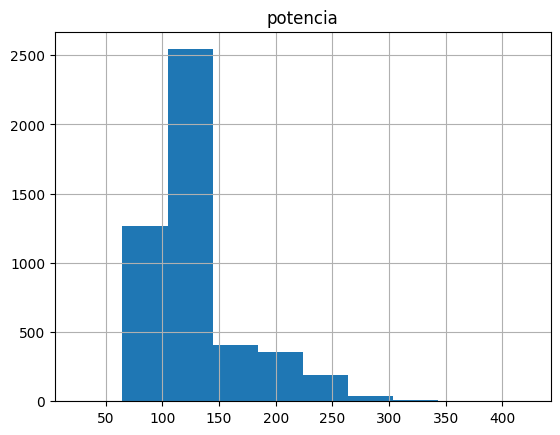

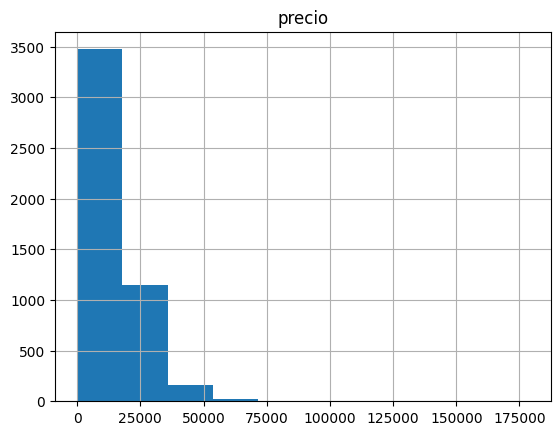

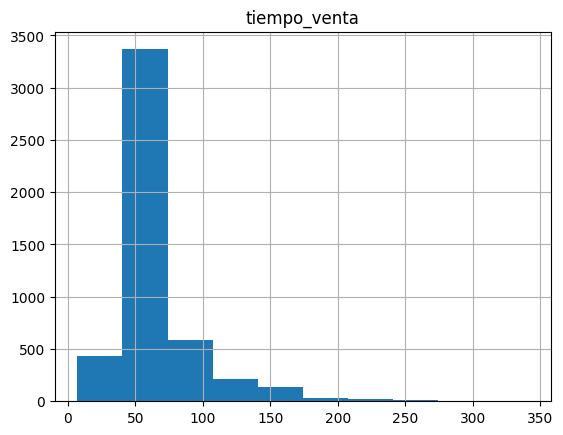

In [107]:
df.info()

for i in df:
    if  df[i].dtype.kind=="f" or df[i].dtype.kind=="i":
        df.hist(column=i)

#'''CORRELACION: DETECTAR SI HAY VARIABLES QUE EXPLICAN LO MISMO'''otra copia para asegurar todo! df_clean3 la buena


In [108]:
corr = df.corr()

<ipython-input-108-45893e33df67>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


In [109]:
corr.style.background_gradient(cmap='coolwarm')

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,tiempo_venta
km,1.000000,-0.049995,0.066203,0.009985,0.002803,-0.053161,0.045854,-0.028449,0.153749,-0.040537,-0.409380,0.505412
potencia,-0.049995,1.000000,0.326919,0.198779,0.312872,0.447442,0.341893,0.232787,0.006001,0.488783,0.639294,-0.082505
volante_regulable,0.066203,0.326919,1.000000,0.306284,0.252794,0.229359,0.278765,0.135541,0.242582,0.223221,0.267077,0.078284
aire_acondicionado,0.009985,0.198779,0.306284,1.000000,0.150851,0.146170,0.283193,0.134298,0.368706,0.222801,0.244780,-0.230429
camara_trasera,0.002803,0.312872,0.252794,0.150851,1.000000,0.199145,0.199794,0.141229,0.060329,0.201371,0.251432,0.023616
asientos_traseros_plegables,-0.053161,0.447442,0.229359,0.146170,0.199145,1.000000,0.250000,0.152332,0.124207,0.276989,0.413169,-0.054321
elevalunas_electrico,0.045854,0.341893,0.278765,0.283193,0.199794,0.250000,1.000000,0.254306,0.202103,0.333426,0.260809,-0.091406
bluetooth,-0.028449,0.232787,0.135541,0.134298,0.141229,0.152332,0.254306,1.000000,0.128525,0.122519,0.209910,-0.071194
gps,0.153749,0.006001,0.242582,0.368706,0.060329,0.124207,0.202103,0.128525,1.000000,-0.064934,-0.008335,0.076995
alerta_lim_velocidad,-0.040537,0.488783,0.223221,0.222801,0.201371,0.276989,0.333426,0.122519,-0.064934,1.000000,0.443323,-0.181466


# ANALISIS DEL TARGET

array([[<Axes: title={'center': 'precio'}>]], dtype=object)

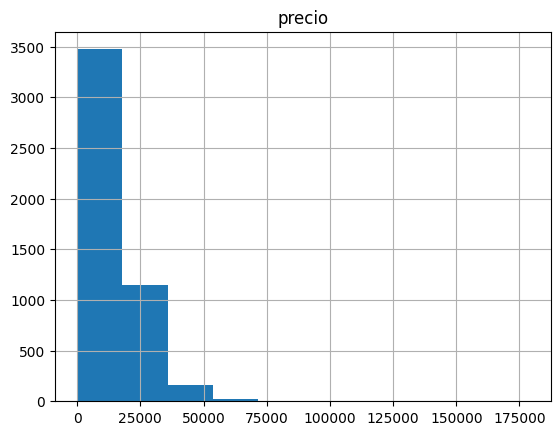

In [110]:
df.hist(column="precio")

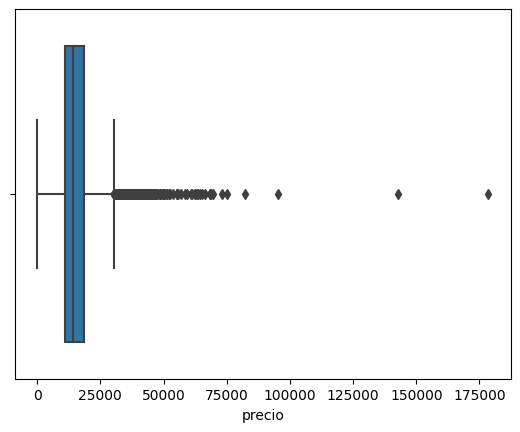

In [111]:
outliers_precio = sns.boxplot(x=df["precio"])

In [112]:
#El precio está afectado por una distribución de skewed, se recomienda normalizarlo para que siga una distribución normal
df["LOG_PRECIO"]=np.log10(df["precio"])

array([[<Axes: title={'center': 'LOG_PRECIO'}>]], dtype=object)

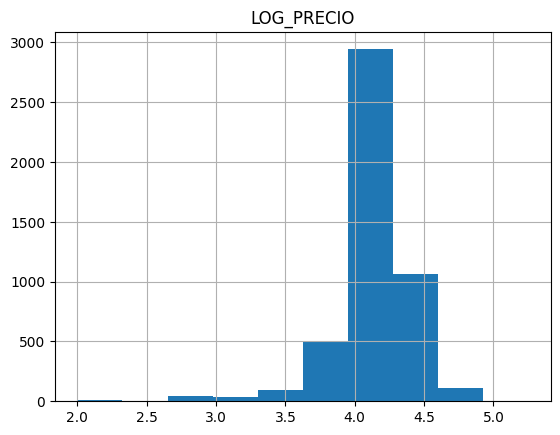

In [113]:
df.hist(column="LOG_PRECIO")

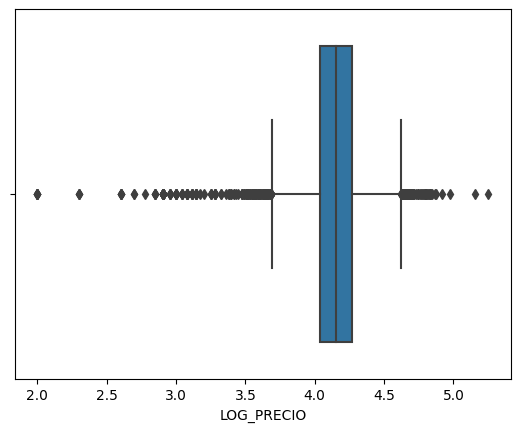

In [114]:
outliers_precio2 = sns.boxplot(x=df["LOG_PRECIO"])

In [115]:
df = pd.get_dummies(data=df, columns=lista_categoricas)

In [116]:
corr = df.corr()

<ipython-input-116-45893e33df67>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


In [117]:
corr.style.background_gradient(cmap='coolwarm')

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,tiempo_venta,LOG_PRECIO,tipo_gasolina_diesel,tipo_gasolina_electro,tipo_gasolina_hybrid_petrol,tipo_gasolina_petrol,color_beige,color_black,color_blue,color_brown,color_green,color_grey,color_orange,color_red,color_silver,color_white,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van,modelo_agrupado_M1,modelo_agrupado_M2,modelo_agrupado_M3,modelo_agrupado_M4,modelo_agrupado_M5,modelo_agrupado_M6,modelo_agrupado_M7,modelo_agrupado_Otros,modelo_agrupado_X_SERIES
km,1.000000,-0.049995,0.066203,0.009985,0.002803,-0.053161,0.045854,-0.028449,0.153749,-0.040537,-0.409380,0.505412,-0.437106,0.047720,-0.037492,-0.034912,-0.036890,-0.018534,0.041138,-0.017259,-0.023864,0.055681,0.025202,-0.030610,-0.027124,0.021706,-0.068139,-0.029620,-0.062195,0.179040,-0.111660,0.060673,-0.023452,-0.112612,-0.094296,-0.113132,-0.126007,0.109479,-0.137867,0.167382,-0.041045,0.001882,-0.069473,-0.113310
potencia,-0.049995,1.000000,0.326919,0.198779,0.312872,0.447442,0.341893,0.232787,0.006001,0.488783,0.639294,-0.082505,0.507935,-0.121898,-0.023994,0.025781,0.122922,-0.012986,0.036839,-0.016562,-0.068991,-0.013548,0.003835,0.011371,-0.006044,0.013151,0.010970,0.037636,0.126742,-0.053665,-0.227161,0.033220,-0.158600,0.237048,-0.054511,-0.322787,-0.058026,-0.293045,0.055069,0.226540,0.209694,0.192423,0.140259,0.237613
volante_regulable,0.066203,0.326919,1.000000,0.306284,0.252794,0.229359,0.278765,0.135541,0.242582,0.223221,0.267077,0.078284,0.249361,0.004794,0.005793,0.016309,-0.009091,-0.016424,0.018605,0.005268,0.043951,0.014212,0.052202,0.008195,-0.033181,-0.023698,-0.110613,0.055642,0.028324,-0.001932,-0.152511,0.054155,-0.105828,0.103387,-0.052831,-0.243165,-0.066747,-0.203715,0.047578,0.270449,0.072701,0.092214,0.043280,0.101611
aire_acondicionado,0.009985,0.198779,0.306284,1.000000,0.150851,0.146170,0.283193,0.134298,0.368706,0.222801,0.244780,-0.230429,0.340631,0.089580,0.012742,0.008196,-0.095396,0.013723,0.033305,-0.000698,0.050709,-0.027706,0.024716,-0.011119,-0.052656,-0.045076,-0.068953,-0.043453,-0.046309,0.097895,-0.085959,0.052319,-0.148410,-0.010564,-0.003062,-0.213076,0.000523,-0.040137,0.020888,0.197990,0.021796,0.054348,-0.026717,-0.012269
camara_trasera,0.002803,0.312872,0.252794,0.150851,1.000000,0.199145,0.199794,0.141229,0.060329,0.201371,0.251432,0.023616,0.198748,-0.009570,-0.012563,-0.007798,0.013083,-0.024062,0.011886,0.001015,-0.011600,0.003156,0.003332,-0.017772,-0.021677,-0.003129,0.003917,-0.044683,0.015979,-0.034366,-0.046962,-0.007560,-0.040335,0.111993,-0.024062,-0.106312,-0.020028,-0.152894,-0.001302,0.105265,0.089126,0.128555,-0.012367,0.109869
asientos_traseros_plegables,-0.053161,0.447442,0.229359,0.146170,0.199145,1.000000,0.250000,0.152332,0.124207,0.276989,0.413169,-0.054321,0.351987,0.073252,-0.012531,0.005023,-0.074707,-0.001304,0.026579,-0.031989,-0.029260,0.020303,-0.019727,-0.003010,-0.006280,0.055376,0.001334,-0.049826,-0.016141,-0.151395,-0.153789,-0.128817,-0.077801,0.491215,-0.040858,-0.172183,-0.050886,-0.275366,-0.004622,-0.032533,0.018025,0.059951,-0.039065,0.489960
elevalunas_electrico,0.045854,0.341893,0.278765,0.283193,0.199794,0.250000,1.000000,0.254306,0.202103,0.333426,0.260809,-0.091406,0.318184,-0.003391,-0.023164,-0.007120,0.007954,-0.022416,0.076253,-0.036420,-0.030094,-0.022653,-0.013660,0.014528,-0.026717,-0.036774,0.016890,0.009721,0.101067,0.042807,-0.096959,0.018478,-0.102491,0.031986,-0.076896,-0.189108,-0.073288,-0.157266,0.108722,0.250620,0.050495,0.055688,-0.012911,0.030557
bluetooth,-0.028449,0.232787,0.135541,0.134298,0.141229,0.152332,0.254306,1.000000,0.128525,0.122519,0.209910,-0.071194,0.204520,-0.023265,-0.014135,-0.011175,0.028063,-0.020762,0.025613,0.007192,-0.057888,-0.002859,-0.039254,0.007525,0.036268,-0.018794,0.063470,0

In [118]:
df.head(10)

,km,potencia,fecha_registro,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,...,tipo_coche_van,modelo_agrupado_M1,modelo_agrupado_M2,modelo_agrupado_M3,modelo_agrupado_M4,modelo_agrupado_M5,modelo_agrupado_M6,modelo_agrupado_M7,modelo_agrupado_Otros,modelo_agrupado_X_SERIES
0,140411,100,2012-02-01,True,True,False,False,True,True,True,...,0,1,0,0,0,0,0,0,0,0
1,13929,317,2016-04-01,True,True,False,False,False,True,True,...,0,0,0,0,0,0,0,0,1,0
2,183297,120,2012-04-01,False,False,False,False,True,False,True,...,0,0,0,1,0,0,0,0,0,0
3,128035,135,2014-07-01,True,True,False,False,True,True,True,...,0,0,0,0,1,0,0,0,0,0
4,97097,160,2014-12-01,True,True,False,False,False,True,True,...,0,0,0,0,1,0,0,0,0,0
5,152352,225,2011-05-01,True,True,False,False,True,True,True,...,0,0,0,1,0,0,0,0,0,0
6,205219,145,2009-05-01,True,True,False,False,True,True,True,...,0,0,0,1,0,0,0,0,0,0
7,115560,105,2009-08-01,True,True,False,False,False,True,True,...,0,1,0,0,0,0,0,0,0,0
8,123886,125,2004-07-01,True,False,False,False,False,True,True,...,0,0,0,0,0,0,0,0,1,0
9,139541,135,2013-06-01,False,False,False,False,True,False,True,...,0,0,0,1,0,0,0,0,0,0


In [122]:
df.to_pickle("/content/drive/MyDrive/Bmw_data_preproceamiento/Clases_limpieza/Clase 1 - Limpieza datos PREPRO_ML.pkl")

In [130]:
df = pd.read_pickle("/content/drive/MyDrive/Bmw_data_preproceamiento/Clases_limpieza/Clase 1 - Limpieza datos PREPRO_ML.pkl")


In [131]:
df.shape

(4802, 46)

In [132]:
df

,km,potencia,fecha_registro,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,...,tipo_coche_van,modelo_agrupado_M1,modelo_agrupado_M2,modelo_agrupado_M3,modelo_agrupado_M4,modelo_agrupado_M5,modelo_agrupado_M6,modelo_agrupado_M7,modelo_agrupado_Otros,modelo_agrupado_X_SERIES
0,140411,100,2012-02-01,True,True,False,False,True,True,True,...,0,1,0,0,0,0,0,0,0,0
1,13929,317,2016-04-01,True,True,False,False,False,True,True,...,0,0,0,0,0,0,0,0,1,0
2,183297,120,2012-04-01,False,False,False,False,True,False,True,...,0,0,0,1,0,0,0,0,0,0
3,128035,135,2014-07-01,True,True,False,False,True,True,True,...,0,0,0,0,1,0,0,0,0,0
4,97097,160,2014-12-01,True,True,False,False,False,True,True,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,66770,110,2015-10-01,False,True,False,False,False,False,True,...,1,0,1,0,0,0,0,0,0,0
4799,39743,110,2015-10-01,False,True,False,False,False,False,True,...,1,0,1,0,0,0,0,0,0,0
4800,49832,100,2015-06-01,False,True,False,False,False,False,True,...,1,0,1,0,0,0,0,0,0,0
4801,19633,110,2015-10-01,False,True,False,False,False,False,True,...,1,0,1,0,0,0,0,0,0,0
